In [121]:
# Importando biblioteca Pandas
import pandas as pd
# Importando biblioteca Matplotlib para plotar gráficos
import matplotlib.pyplot as plt
# Selecionano estilos de gráficos 

# Importando biblioteca locale para formatar valores na moeda brasileira
import locale
# Setando o locale para o Brasil (ajuste para o seu país se necessário)
locale.setlocale(locale.LC_ALL, 'pt_BR')

plt.style.use("bmh")

In [188]:
# Criando nosso dataframe
df = pd.read_excel('AdventureWorks.xlsx')

In [190]:
# Visualizando as colunas
print(df.columns)

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')


In [191]:
# Contando valores nulos por coluna
print(df.isnull().sum())

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64


In [192]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [74]:
# Verificando tipos de dados
df.dtypes

Ordem Venda                   int64
Produto                       int64
Data da Venda        datetime64[ns]
Data do Envio        datetime64[ns]
Quantidade                    int64
Preço Unitário              float64
Desconto Unitario             int64
Custo Unitário              float64
Custo Total                 float64
Valor da Venda              float64
dtype: object

In [254]:
# Visualizando uma amostra.
display(df.sample(2))

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo de Envio
471,2008-12-06,2008-12-10,307,366,19110,200812063CS656,348.58,758.00,15,"1,705.50","9,664.50",Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"5,228.70","4,435.80",4
511,2008-02-12,2008-02-20,307,1155,19094,200802124CS549,324.69,980.00,10,"1,960.00","7,840.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"3,246.90","4,593.10",8


## Qual o valor da receita total?

In [195]:
# Calculando a receita total
receita_total = df['Valor Venda'].sum()

# Formatando o número para o formato de moeda 
receita_formatada = locale.format_string("%d", receita_total, grouping=True)

# Criando a mensagem de saída
print(f'A receita total foi de R$ {receita_formatada}')

A receita total foi de R$ 5.984.606


## Qual o valor do custo total?

In [196]:
# Criando uma coluna com o custo total
df['Custo Total'] = df['Custo Unitário'] * df['Quantidade']

# Calculando a soma do custo total
custo_total = df['Custo Total'].sum()

# Formatando o número para o formato de moeda 
custo_formatado = locale.format_string("%d", custo_total, grouping=True)

# Criando a mensagem de saída
print(f'O custo total foi de R$ {custo_formatado}')

O custo total foi de R$ 2.486.783


## Quanto foi o lucro?

In [200]:
# Criando uma coluna com o valor do lucro no dataframe
df['Lucro'] = df['Valor Venda'] - df['Custo Total']

# Criando uma variável com o valor total de lucro
lucro = (df['Lucro'].sum())

# Formatando o número para o formato de moeda 
lucro_formatado = locale.format_string("%d", lucro, grouping=True)

# Criando a mensagem de saída
print(f'O lucro total foi de R$ {lucro_formatado}')

O lucro total foi de R$ 3.497.823


## Crie uma coluna com o tempo que levou para cada produto ser entregue, em dias

In [204]:
# Criando coluna com tempo de envio em dias
df['Tempo de Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

# Visualizando uma amostra.
display(df.sample(2))

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo de Envio
547,2008-12-16,2008-12-20,306,1202,19060,200812164CS676,330.66,998.0,4,798.4,3193.6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1322.64,1870.96,4
61,2008-06-29,2008-07-06,306,1202,19053,200806294CS586,330.66,998.0,6,0.0,5988.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1983.96,4004.04,7


## Qual o valor médio de venda por produto?

Text(0, 0.5, 'Produtos')

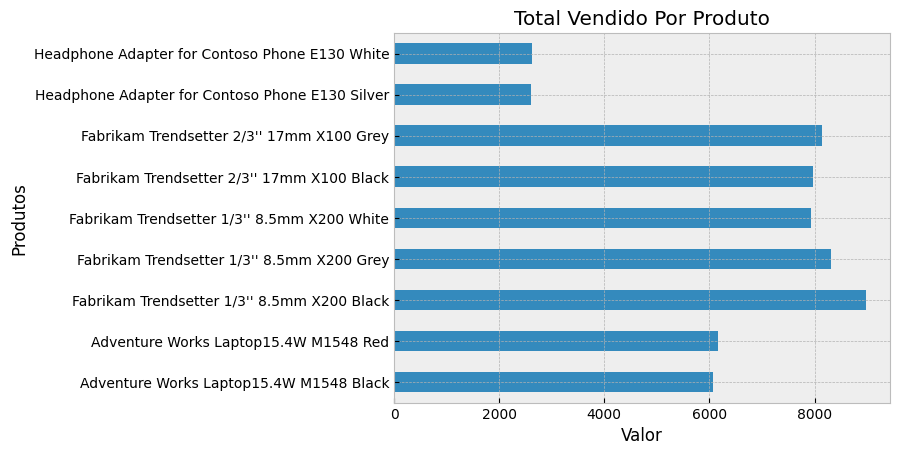

In [252]:
# Calculando o valor médio por produto e plotando no gráfico
df.groupby('Produto')['Valor Venda'].mean().round(2).plot.barh(title='Méida de venda Por Produto')
plt.xlabel('Valor')
plt.ylabel('Produtos')

## Agrupe o lucro por ano e marca.

In [237]:
# Formatando o tipo float
pd.options.display.float_format = '{:20,.2f}'.format

# Agrupando o lucro por ano e marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

## Qual o total de produtos vendidos?

Text(0, 0.5, 'Produtos')

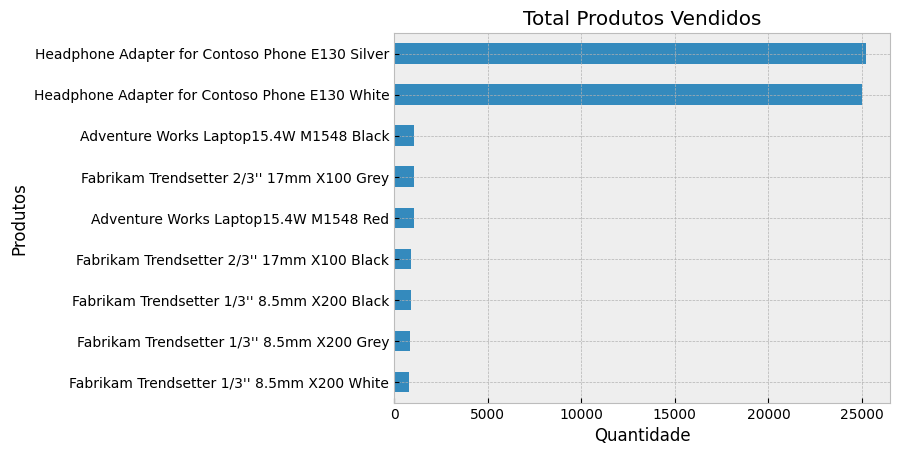

In [255]:
# Agrupando por produto e plotando em um gráfico
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Total Produtos Vendidos')
plt.xlabel('Quantidade')
plt.ylabel('Produtos')

## Qual o lucro por ano?

(array([0, 1]), [Text(0, 0, '2008'), Text(1, 0, '2009')])

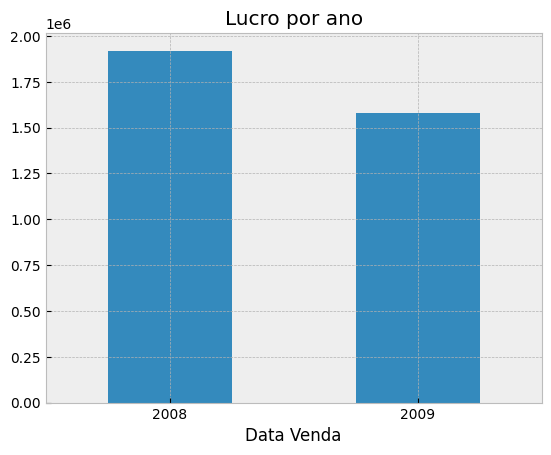

In [280]:
# Agrupando o lucro por ano e plotando em um gráfico
df.groupby([df['Data Venda'].dt.year])['Lucro'].sum().plot.bar(title='Lucro por ano')
plt.xticks(rotation='horizontal')

## Qual o lucro por mês do ano de 2009?

<Axes: title={'center': 'Lucro por mês'}, xlabel='Data Venda'>

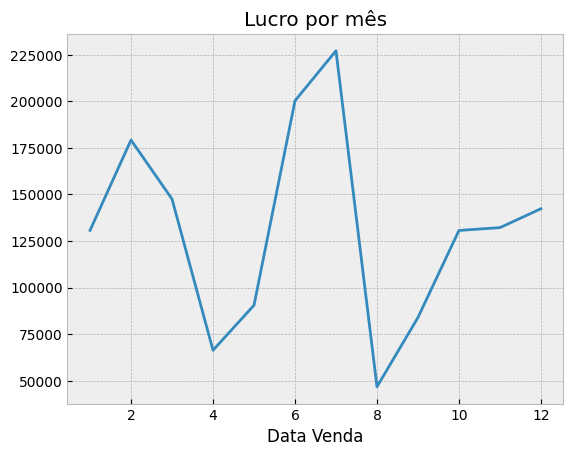

In [281]:
# Filtrando as vendas de 2009 e atribuindo a uma nota variável
df_2009 = df[df['Data Venda'].dt.year == 2009]

# Agrupando o lucro por ano e plotando gráfico
df_2009.groupby([df['Data Venda'].dt.month])['Lucro'].sum().plot(title='Lucro por mês')

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

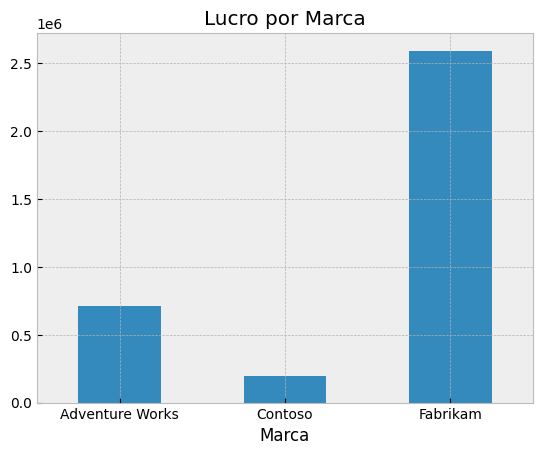

In [285]:
# Agrupando o lucro por marca e plotando em um gráfico
df.groupby([df['Marca']])['Lucro'].sum().plot.bar(title='Lucro por Marca')
plt.xticks(rotation='horizontal')

## Exibindo estatísticas sobre os dados

In [287]:
df['Tempo de Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo de Envio, dtype: float64

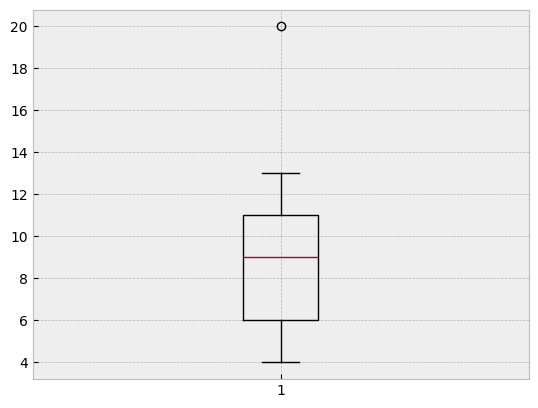

In [296]:
# Gráfico de boxplot do tempo de envio
plt.boxplot(df['Tempo de Envio']);

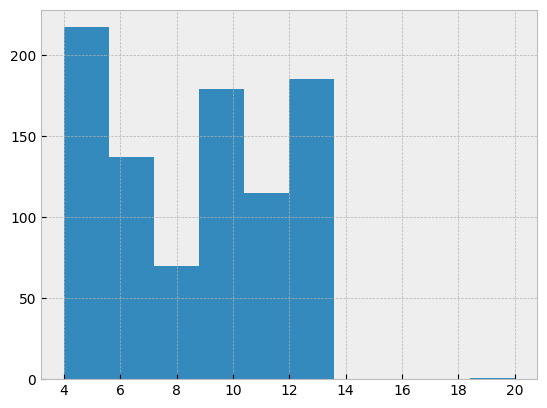

In [295]:
# Histograma do tempo de envio
plt.hist(df['Tempo de Envio']);